# HW7_Florian_Kavish_10ArmBandits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
std = 1
epsilon = [0.1,0.01,0.009]

In [4]:
def get_reward(action, mean):
    r = np.random.normal(mean, std)
    return r

In [15]:
N_episodes = 1000
N_exp = 2000

Q is a list for reward and
k is a list for number of actions

In [16]:
def main(epsilons):
    reward_history_avg = np.zeros((N_exp,N_episodes))
    optimal_act = np.zeros((N_exp,N_episodes))
    for _ in range(N_exp):
        Q = np.zeros(10)
        k = np.zeros(10)
        opt = 0   
        prob_dist = np.random.normal(0,1,10)
        for i in range(N_episodes):
            n = np.random.rand(1)
            if n[0] < epsilons:
                action = np.random.randint(10)
                reward = get_reward(action, prob_dist[action])
                k[action] += 1
                Q[action] = Q[action] + (1./k[action]) * (reward - Q[action])
                if action == np.argmax(prob_dist):
                    optimal_act[_,i] = 1
                reward_history_avg[_, i] = reward
            else: 
                action = np.argmax(Q)
                reward = get_reward(action, prob_dist[action])
                k[action] += 1
                Q[action] = Q[action] + (1./k[action]) * (reward - Q[action])
                if action == np.argmax(prob_dist):
                    optimal_act[_,i] = 1
                reward_history_avg[_,i] = reward        
        
    averaged_rewards = np.mean(reward_history_avg, axis = 0)
    avg_optimal_action = np.mean(optimal_act, axis=0)
    return averaged_rewards,  avg_optimal_action

In [17]:
epsilon_1_reward, ep_1_opt = main(epsilon[0])
epsilon_2_reward, ep_2_opt = main(epsilon[1])
epsilon_3_reward, ep_3_opt = main(epsilon[2])

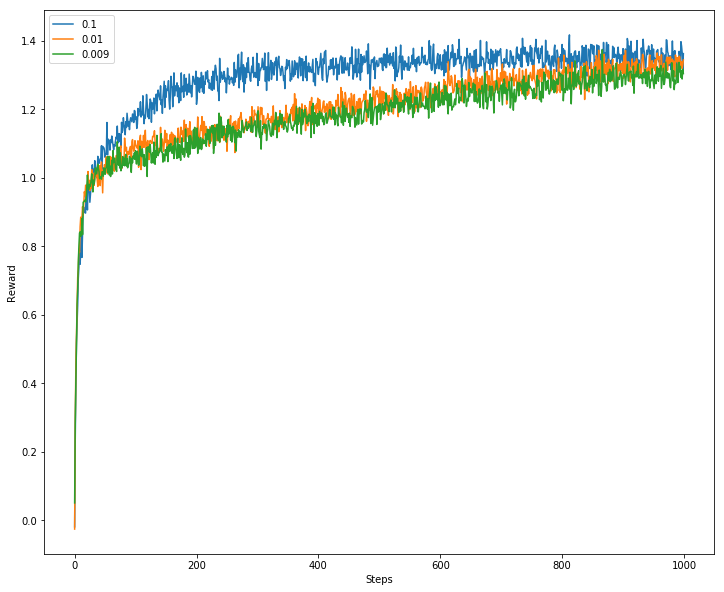

In [18]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Steps')
ax.set_ylabel('Reward')
ax.plot(epsilon_1_reward, label = '0.1')

plt.plot(epsilon_2_reward, label = '0.01')

plt.plot(epsilon_3_reward, label = '0.009')

plt.legend()
plt.show()

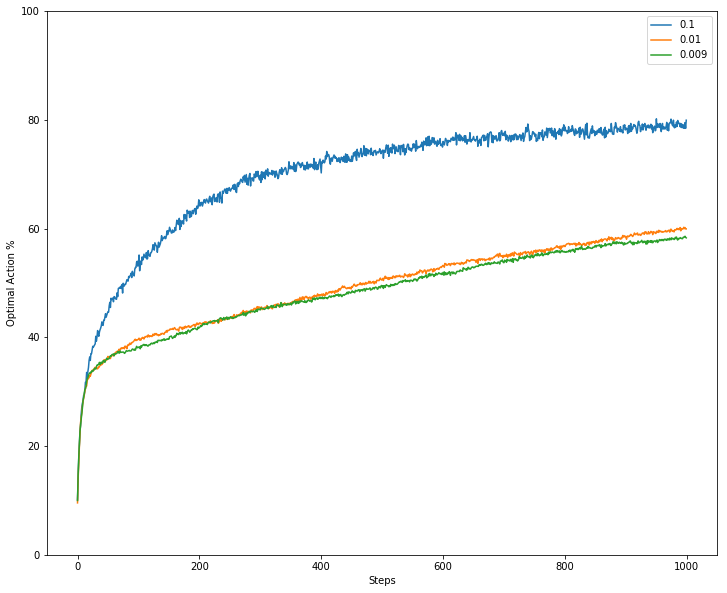

In [19]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Steps')
ax.set_ylabel('Optimal Action %')
ax.set_ylim(0,100)
ax.plot(ep_1_opt*100, label = '0.1')

plt.plot(ep_2_opt*100, label = '0.01')

plt.plot(ep_3_opt*100, label = '0.009')

plt.legend()
plt.show()